In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування візуалізацій
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Завантажуємо дані з попереднього етапу
data_path = '../data/data_with_temporal_features.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

print("Дані успішно завантажено. Розмір:", df.shape)
df.head()

Дані успішно завантажено. Розмір: (34560, 17)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,day_of_month,day_of_year,week_of_year,month,year,quarter,is_weekend
DateTime,,,,,,,,,,,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0,0,10,6,17,351,50,12,2006,4,1
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0,0,11,6,17,351,50,12,2006,4,1
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,12,6,17,351,50,12,2006,4,1
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,13,6,17,351,50,12,2006,4,1
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,14,6,17,351,50,12,2006,4,1


In [2]:
def create_lag_features(df_input, target_column='Global_active_power', lags=[1, 2, 3, 24, 48, 168]):
    """
    Створює лагові ознаки для заданого стовпця.
    """
    df = df_input.copy()

    for lag in lags:
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)

    return df

# Створюємо лаги для нашого головного показника
df_with_lags = create_lag_features(df)

# Подивимось на результат. Зверніть увагу на значення NaN на початку.
# Вони з'являються, тому що для перших рядків немає минулих даних.
print("DataFrame з лаговими ознаками:")
display(df_with_lags.head(5))

# Подивимось на дані трохи пізніше, де вже є значення
display(df_with_lags.tail(5))

DataFrame з лаговими ознаками:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,...,month,year,quarter,is_weekend,Global_active_power_lag_1,Global_active_power_lag_2,Global_active_power_lag_3,Global_active_power_lag_24,Global_active_power_lag_48,Global_active_power_lag_168
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0,0,10,6,...,12,2006,4,1,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0,0,11,6,...,12,2006,4,1,166.352,NaN,NaN,NaN,NaN,NaN
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,12,6,...,12,2006,4,1,105.120,166.352,NaN,NaN,NaN,NaN
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,13,6,...,12,2006,4,1,0.000,105.120,166.352,NaN,NaN,NaN
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,14,6,...,12,2006,4,1,0.000,0.000,105.120,NaN,NaN,NaN


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,...,month,year,quarter,is_weekend,Global_active_power_lag_1,Global_active_power_lag_2,Global_active_power_lag_3,Global_active_power_lag_24,Global_active_power_lag_48,Global_active_power_lag_168
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-26 05:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,5,4,...,11,2010,4,0,0.000,0.000,0.0,0.000,0.0,0.0
2010-11-26 06:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,6,4,...,11,2010,4,0,0.000,0.000,0.0,0.000,0.0,0.0
2010-11-26 07:00:00,25.896,0.956,238.299000,10.780000,12.0,14.0,174.0,0,7,4,...,11,2010,4,0,0.000,0.000,0.0,108.730,0.0,0.0
2010-11-26 08:00:00,118.536,6.732,239.713729,8.376271,534.0,40.0,1040.0,0,8,4,...,11,2010,4,0,25.896,0.000,0.0,95.652,0.0,0.0
2010-11-26 09:00:00,87.676,3.016,239.478810,8.714286,534.0,0.0,739.0,0,9,4,...,11,2010,4,0,118.536,25.896,0.0,44.728,0.0,0.0


In [3]:
def create_rolling_features(df_input, target_column='Global_active_power', windows=[3, 6, 12, 24, 168]):
    """
    Створює ознаки ковзного вікна (середнє та стандартне відхилення).
    """
    df = df_input.copy()

    for window in windows:
        # min_periods=1 дозволяє рахувати статистику, навіть якщо даних менше, ніж розмір вікна (на початку ряду)
        df[f'{target_column}_roll_mean_{window}'] = df[target_column].shift(1).rolling(window=window, min_periods=1).mean()
        df[f'{target_column}_roll_std_{window}'] = df[target_column].shift(1).rolling(window=window, min_periods=1).std()

    return df

# Застосовуємо функцію до датасету, в якому вже є лаги
df_with_rolling = create_rolling_features(df_with_lags)

# Після створення лагів та ковзних фіч, перші рядки стають неінформативними через NaN.
# Давайте їх видалимо.
df_final_features = df_with_rolling.dropna()


print(f"Початковий розмір: {df_with_rolling.shape[0]}")
print(f"Розмір після видалення NaN: {df_final_features.shape[0]}")

print("\nФінальний датасет з усіма ознаками:")
display(df_final_features.head())

Початковий розмір: 34560
Розмір після видалення NaN: 4912

Фінальний датасет з усіма ознаками:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,...,Global_active_power_roll_mean_3,Global_active_power_roll_std_3,Global_active_power_roll_mean_6,Global_active_power_roll_std_6,Global_active_power_roll_mean_12,Global_active_power_roll_std_12,Global_active_power_roll_mean_24,Global_active_power_roll_std_24,Global_active_power_roll_mean_168,Global_active_power_roll_std_168
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-24 15:00:00,47.476,4.238,243.111538,15.230769,393.0,242.0,0.0,0,15,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.984667,84.989584,14.817560,45.796409
2006-12-24 16:00:00,63.618,4.220,243.766667,12.695238,412.0,38.0,150.0,0,16,6,...,15.825333,27.410281,7.912667,19.381996,3.956333,13.705141,42.962833,84.545525,14.349155,45.046998
2006-12-25 11:00:00,79.308,3.826,237.968750,20.837500,581.0,0.0,278.0,0,11,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.628917,15.862145,12.981619,43.531523
2006-12-25 12:00:00,171.328,18.812,240.898596,12.842105,1359.0,0.0,272.0,0,12,0,...,26.436000,45.788495,13.218000,32.377355,6.609000,22.894248,7.933417,21.948993,13.453690,43.818976
2006-12-25 13:00:00,97.054,3.166,240.593333,13.720000,1122.0,4.0,0.0,0,13,0,...,83.545333,85.742563,41.772667,70.955350,20.886333,52.577368,15.072083,39.832387,14.473500,45.466690


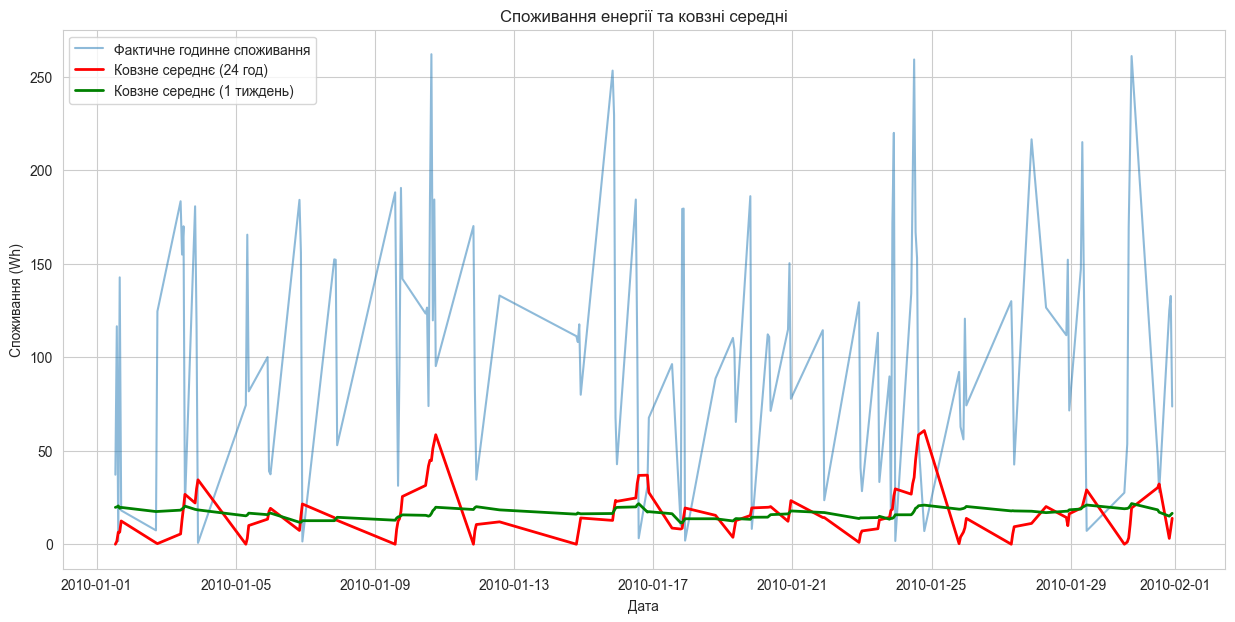

In [4]:
# Візьмемо дані за один місяць для наочності
sample_month = df_final_features['2010-01-01':'2010-01-31']

plt.plot(sample_month.index, sample_month['Global_active_power'], label='Фактичне годинне споживання', alpha=0.5)
plt.plot(sample_month.index, sample_month['Global_active_power_roll_mean_24'], label='Ковзне середнє (24 год)', color='red', linewidth=2)
plt.plot(sample_month.index, sample_month['Global_active_power_roll_mean_168'], label='Ковзне середнє (1 тиждень)', color='green', linewidth=2)

plt.title('Споживання енергії та ковзні середні')
plt.xlabel('Дата')
plt.ylabel('Споживання (Wh)')
plt.legend()
plt.show()

In [5]:
# Зберігаємо фінальний DataFrame
output_path = '../data/final_features_dataset.csv'
df_final_features.to_csv(output_path)

print(f"Фінальний DataFrame з усіма ознаками успішно збережено в: {output_path}")

Фінальний DataFrame з усіма ознаками успішно збережено в: ../data/final_features_dataset.csv
